# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: How often do the regular users use the bikes? Do the regular users go over the 30 minutes limit? How often do all users go over the limit? Do casual users go over the limit? General percentage of casual users vs regular users? 

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates

    #This function prints and returns the first data point (second row) from
    #a csv file that includes a header row.
    
    # print city name for reference from the file name, without looking into the file
    # for example './data/NYC-CitiBike-20
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference from the file name, without looking into the file
    # for example './data/NYC-CitiBike-2016.csv'
    # will return NYC from .. /NYC- .. 
       #start by parsing the file's name
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        #DictReader can be used to specify 'field names', which by default (if not specified)
            #is taken to be the first row of the file
            #since field name is not specified, first row will be the field name
            # When you set up a DictReader object, the first row of the data file is normally interpreted as column names. 
            #Every other row in the data file will use those column names as keys, 
            #as a dictionary is generated for each row.([(1st field name, 1st value), (2nd name, 2nd value)..])
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
            #use next() Dict function on DictReader object to grab the first row of the dictionary
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
            #Will print each column in a new line
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
# NOTE: ideal set to use to test out the rest of the upcoming logic
    #LATER: Follow the same process of setting up a dictionary which will collect compressed info
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
    


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, **if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.**

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [4]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'NYC' or city == 'Chicago':
        duration = float(datum['tripduration'])
        return duration/60
    elif city == 'Washington':
        duration = float(datum['Duration (ms)'])
        return duration/60000

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001
    

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    if city == 'Chicago':
        # Strip time in matching format using strptime
        date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
    elif city == 'Washington':
        # Strip time in matching format using strptime
        date = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
    elif city ==  'NYC':
        date = datetime.strptime(datum['starttime'],  '%m/%d/%Y %H:%M:%S')     
            
    #Use strFtime to parse the parts that you need    
    #Make sure you convert to type int
    month = int(datetime.strftime(date, '%m'))
    hour = int(datetime.strftime(date, '%H'))
    day_of_week = datetime.strftime(date, '%A')
    
    return (month, hour, day_of_week)



# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]
    


In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'Chicago' or city == 'NYC':
        user_type = datum['usertype']
    elif city == 'Washington':
        user_type = datum['Member Type']
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Registered'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        
        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = time_of_trip(row, city)[2]
            
            new_point['user_type'] = type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Registered')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
- City with the highest number of trips: **NYC**
- City with highest proportion of trips made by subscribers: **NYC**
- City with highest proportion of trips by short-term customer: **Chicago**

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports tthe total number of trips
        and goes further to show the proportion of trips split according to user_type
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # determine city from filename
        city = filename.split('-')[0].split('/')[-1]
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
       
        # tally up ride types based on city
        if city == 'Washington':
            for row in reader:
                if row['user_type'] == 'Registered': 
                    n_subscribers += 1
                else:
                    n_customers += 1
        elif city == 'Chicago' or city == 'NYC':
            for row in reader:
                if row['user_type'] == 'Subscriber':
                    n_subscribers += 1
                else:
                    n_customers += 1
        # compute total number of rides
        n_total = n_subscribers + n_customers
        # return tallies as a tuple
        return(n_total, n_subscribers/n_total, n_customers/n_total)
        
        
        
        

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = './data/NYC-2016-Summary.csv'
print('NYC')
print(number_of_trips(data_file))
data_file = './data/Chicago-2016-Summary.csv'
print('Chicago')
print(number_of_trips(data_file))
data_file = './data/Washington-2016-Summary.csv'
print('Washington')
print(number_of_trips(data_file))

NYC
(276798, 0.8883590199351151, 0.11164098006488486)
Chicago
(72131, 0.7622520136973008, 0.23774798630269925)
Washington
(66326, 0.7802822422579381, 0.21971775774206193)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
- The average length of the trip in NYC is 15.8 minutes
- The average length of the trip in Chicago is 16.6 minutes
- The average length of the trip in Washington is 18.9 minutes

- The percentage of trips in NYC over 30 minutes is 7.3%
- The percentage of trips in Chicago over 30 minutes is 8.3%
- The percentage of trips in Washington over 30 minutes is 10.8%

In [10]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def avg_trip_length(filename):
    """ takes filename for specific city and determines city name 
            and calculates average trip length for duration
        total     type float to hold the total as a accurate amount
        count     type int to calculate average of total 
        Will return in type int - which automatically rounds down
    """
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        #use for to go through all data and iterate total amounnt
        #also ensure that string values are converted to float
        total = 0.0
        count = 0
        for row in reader:
            total += float(row['duration'])
            count += 1
        #CHANGE: return int(total/count)
        #changing return to use later in 4c requiring 1 decimal point
        return round(total/count,1), 

# test with bay area file to ensure average_trip_length() function works
# expected value is 14 mins
datafile = './examples/BayArea-Y3-Summary.csv'
print(str(avg_trip_length(datafile)))    


14.0


In [11]:
## print to display averages for the three cities 
datafile_list = ('./data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/Washington-2016-Summary.csv')
for datafile in datafile_list:
    avg_string = str(avg_trip_length(datafile))  
    # determine city from filename
    city = datafile.split('-')[0].split('/')[-1]
    print("The average length of the trip in {} is {} minutes".format(city, avg_string))

        

The average length of the trip in NYC is 15.8 minutes
The average length of the trip in Chicago is 16.6 minutes
The average length of the trip in Washington is 18.9 minutes


In [12]:
# Write function to determine the count of trips that are longer that 30 mins
def thirty_plus_trip(filename):
    """takes filename of type string and use csv to create reader object
        Go through the 'duration' field in file and return percentage of trips longer than 30 minutes
        total_count: type int         To calculate percentage against
        thirty_plus_count: type int   Use conditional to determine greater than 30 mins
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        #for statement to go through each line
        #ensure that what you are returning from csv is converted to int
        total_count = 0
        thirty_plus_count = 0
        for row in reader:
            total_count += 1
            if float(row['duration']) > 30.0:
                thirty_plus_count += 1
    return float((thirty_plus_count/total_count)*100)

#Test with BayArea to see if function works. Expected result is 3.5
datafile = './examples/BayArea-Y3-Summary.csv'
print(round(thirty_plus_trip(datafile),1))

3.5


In [13]:
## Display percentage of trips over 30 minutes for the three cities 
datafile_list = ('./data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/Washington-2016-Summary.csv')
for datafile in datafile_list:
    percentage_string = str(round(thirty_plus_trip(datafile),1))  
    # determine city from filename
    city = datafile.split('-')[0].split('/')[-1]
    print("The percentage of trips in {} over 30 minutes is {}%".format(city, percentage_string))

The percentage of trips in NYC over 30 minutes is 7.3%
The percentage of trips in Chicago over 30 minutes is 8.3%
The percentage of trips in Washington over 30 minutes is 10.8%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: On average it is Customers who take longer rides on average, and it is by a lot 

In [14]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

## All commented out code below was an attempt to call another function
## presently getting results without calling function in order to move on

def duration_by_user(filename):
    """function to determine average times by customer type
    subscriber_count:type int    count of user_type subscriber
    customer_count:type int      count of user_type customer
    subscriber_sum and customer_sum:type float    sum of durations
    """
    subscriber_count = 0
    customer_count = 0
    subscriber_sum = 0.0
    customer_sum = 0.0
    #customer_list = ['duration']
    #subscriber_list = ['duration']
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subscriber_count += 1
                subscriber_sum += float(row['duration'])
                #subscriber_list.append(row['duration'])
            elif row['user_type'] == 'Customer':
                customer_count += 1
                customer_sum += float(row['duration'])
                #customer_list.append(row['duration'])
    subscriber_average = round(subscriber_sum/subscriber_count, 1)
    customer_average = round(customer_sum/customer_count, 1)
    
    #use join statement to put all list items into new line
    #subscriber_file = "\n".join(subscriber_list)
    #customer_file = str("\n".join(customer_list))
    
    #return tuple 
    return subscriber_average, customer_average
    
#Test function using bay area data. Expected values are 54.6(customer) and 9.5(subscriber)
datafile = './examples/BayArea-Y3-Summary.csv'
#print(duration_by_user(datafile))
#filename = duration_by_user(datafile).strip()

duration_by_user(datafile)

(9.5, 54.6)

In [15]:
## For compatibility of 'user_type', will be using Chicago
datafile = './data/Chicago-2016-Summary.csv'
duration_by_user(datafile)

(12.1, 31.0)

<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

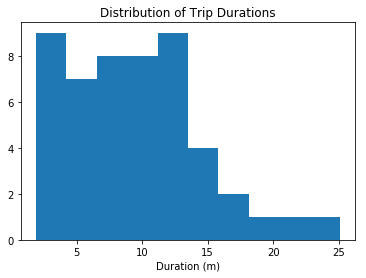

In [16]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [17]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
def city_hist_plot(filename):
    """Function to collect duration info for Chicago in csv file and put it in list
            to be used to plot graphs
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        #initialize list file
        duration_list = []
        for row in reader:  
            #convert to float so that hist function treats data properly
            duration_float = float(row['duration'])
            duration_list.append(duration_float)
        return duration_list
    
#test to see if list file was created properly
datafile = './data/Chicago-2016-Summary.csv'
duration_data = city_hist_plot(datafile)
#print(duration_data)
#Comment above: Duration data is displayed correctly - Removing before export report


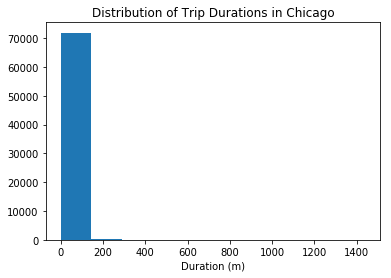

In [18]:
#Create plot based on the duration_data list file created above
plt.hist(duration_data)
plt.title('Distribution of Trip Durations in Chicago')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Peak for Subscribers is in the 5-10 minute mark, whereas for Customers it is in the 20-25 minute mark. Both distribution skew to the right due to heavy usage below 30 mins however the spread and range is signicantly different in both:

Subscribers: The peak for subscribers amounts for the most number, with the areas around the peak (at less than 5 minutes and more than 5 minutes) also have high usage, but are signficntly lower than usage of 5 to 10 minutes. For example Subscibers using the bikes for less than 5 minutes is close to half that of usage in the 5 minute to 10 minute range. This results in the bigger skew

Customers, on the other hand have a larger spread with the numbers of usage for the 15-20 minute mark being very close to the peak. Even usage frequency below 15 minutes and over 25 minutes are also signficant, resulting in a wider spread. The skew is lesser for customers as a higher proportion ends up going over the 30 minute 'extra-fee' limit. 

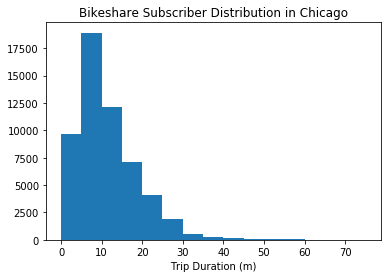

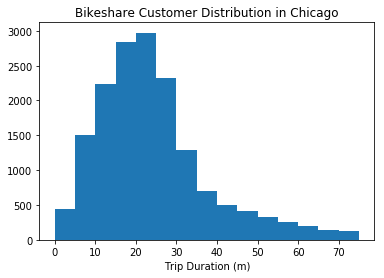

In [19]:
## Use this and additional cells to answer Question 5. ##
# NOTE: For future ensure that you make better use of 'helper' functions
# For this exercise chosen city for analysis is Chicago
# Present approach is to learn about plotting and working with 'bins'
def data_by_user(filename):
    """Function to output condensed list of duration data based on customer type
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        #initialize 2 list files
        subscriber_list = []
        customer_list = []
        for row in reader:  
            if row['user_type'] == 'Subscriber':
                subscriber_list.append(float(row['duration']))
            elif row['user_type'] == 'Customer':
                customer_list.append(float(row['duration']))
        return subscriber_list, customer_list

#Set up test and datafile
datafile = './data/Chicago-2016-Summary.csv'

#Set up for user_type 'Subscriber', using function()[0]
#Range and bins setup to better distribute data for accurate analysis
plt.hist(data_by_user(datafile)[0], bins=15, range=(0,75))
plt.title('Bikeshare Subscriber Distribution in Chicago')
plt.xlabel('Trip Duration (m)')
plt.show()

#Customer distribution
plt.hist(data_by_user(datafile)[1], bins=15, range=(0,75))
plt.title('Bikeshare Customer Distribution in Chicago')
plt.xlabel('Trip Duration (m)')
plt.show()


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Visualize is shown for riders in Chicago area. Visualization shows distinction amongst user types based on season. 

1. Releative usage according to season for both customer and subscribers are the same, with usage can organized in the following order (Highest to Lowest): Summer - Spring - Fall - Winter
2. A more significant change in usage amongst customers season-to-season. Change in subscriber usage is very slight


In [20]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

def season_ridership(filename):
    """Rider ship calculated according to season
        Winter is in (Dec,Jan, Feb); Fall is in (Sep,Oct,Nov); summer is in (June, july, aug); spring is (mar, apr, may)
        Observed a pattern when creating repetitive conditionals and for statements. Effectively combined patterns 
                into a very effective function to output 'total' and 'count' according to 'user type' and season
                
        This was also a perfect time to learn about dictionaries. Effective loops/iterations were in effect due
            to the use of dictionaries
            -- Able to use the same key ('spring', 'summer') etc to identify output dictionary and conditional dictionary
    """
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #Create dictionary for the output format, making it easy to utilize collected data
        subscriber_season = {'spring': {'count': 0, 'total': 0, }, 
                           'summer': {'count': 0, 'total': 0}, 
                           'fall': {'count': 0, 'total': 0}, 
                           'winter': {'count': 0, 'total': 0}}
        customer_season = {'spring': {'count': 0, 'total': 0}, 
                           'summer': {'count': 0, 'total': 0}, 
                           'fall': {'count': 0, 'total': 0}, 
                           'winter': {'count': 0, 'total': 0}}

        #Create a dictionary for months falling under a particular season
        month_conversion =  {'spring': (3,4,5), 
                             'summer': (6,7,8), 
                             'fall': (9,10,11), 
                             'winter': (12,1,2) }
       
        for row in reader:
            if row['user_type'] == 'Subscriber':
                for season in month_conversion:
                    if int(row['month']) in month_conversion[season]:
                        subscriber_season[season]['total'] += float(row['duration'])
                        subscriber_season[season]['count'] += 1
            elif row['user_type'] == 'Customer':
                for season in month_conversion:
                    if int(row['month']) in month_conversion[season]:
                        customer_season[season]['total'] += float(row['duration'])
                        customer_season[season]['count'] += 1
                        
        return subscriber_season, customer_season

#TEST - to verify output
datafile = './data/Chicago-2016-Summary.csv'    
print(season_ridership(datafile)[0])
      
                

{'spring': {'count': 11903, 'total': 142193.5500000001}, 'summer': {'count': 21198, 'total': 275325.88333333295}, 'fall': {'count': 16158, 'total': 185352.81666666677}, 'winter': {'count': 5723, 'total': 60606.63333333331}}


In [21]:
## Data from above needs to be conditioned to be used in a plot

#Subscriber and customer averages in following order: (Spring, Summer, Fall, Winter)
#List needs to be set up to be used in plot
subscriber_averages = [];
customer_averages = []

#subscriber and customer data taken from output tuple from cell above 
subscriber_dict = season_ridership(datafile)[0]
customer_dict = season_ridership(datafile)[1]

# below the <dictionary>.keys() will return same values for both subscriber and customer, 
        # so just using it once
for season in subscriber_dict.keys():
    subscriber_averages.append(subscriber_dict[season]['total']/ subscriber_dict[season]['count']) 
    customer_averages.append(customer_dict[season]['total']/customer_dict[season]['count'])

# Test to verify the output
print(subscriber_averages, customer_averages)

[11.946026211879367, 12.98829527942886, 11.471272228411113, 10.590011066456983] [31.04742626599886, 32.00098941555467, 29.43722209912108, 24.814380952380976]


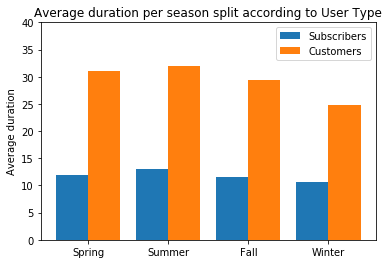

In [22]:
# Used the conditioned list subscriber_averages and customer_averages to plot a stacked bar graph

import numpy as np
import matplotlib.pyplot as plt

# to represent the number of seasons
N=4
ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

#note 'bottom' to stack subscribers on top
#p1 = plt.bar(ind, subscriber_averages, width, bottom = customer_averages)
#p2 = plt.bar(ind, customer_averages, width)
p1 = plt.bar(ind-0.2, subscriber_averages, width)
p2 = plt.bar(ind+0.2, customer_averages, width)

plt.ylabel('Average duration')
plt.title('Average duration per season split according to User Type')
plt.xticks(ind, ('Spring', 'Summer', 'Fall', 'Winter'))
plt.yticks(np.arange(0, 41, 5))
plt.legend((p1[0], p2[0]), ('Subscribers', 'Customers'))

plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I work in the field of travel. There is an extensive amount of travel data and lots of data analysis can be done to provide valuable information to travel agencies, airlines as well as customer base

It would be valuable to learn things like
- Most popular destinations from home city (Toronto)
- Most common time of travel to all cities compared to popular destination
- Length of travel according to season

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.